Predict the price of the Uber ride from a given pickup point to the agreed drop-off location.
Perform following tasks:
1. Pre-process the dataset.
2. Identify outliers.
3. Check the correlation.
4. Implement linear regression and random forest regression models.
5. Evaluate the models and compare their respective scores like R2, RMSE, etc.
Dataset link: https://www.kaggle.com/datasets/yasserh/uber-fares-dataset

**1.Pre-process the dataset.**

In [4]:
import pandas as pd
import numpy as np

In [5]:
uber=pd.read_csv('uber.csv')
uber

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [6]:
uber.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [7]:
uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [8]:
uber.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [9]:
data=uber.dropna()

In [10]:
data

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


**2.Identify outliers.**

In [11]:
data=data[data['fare_amount']>0]
data=data[data['passenger_count']>0]
data=data[data['passenger_count']<8]
data.shape

(199268, 9)

In [12]:
data=data[data['pickup_longitude']>-180]
data=data[data['pickup_longitude']<180]
data=data[data['dropoff_longitude']>-180]
data=data[data['dropoff_longitude']<180]
data=data[data['pickup_latitude']>-90]
data=data[data['pickup_latitude']<90]
data=data[data['dropoff_latitude']>-90]
data=data[data['dropoff_latitude']<90]
data.shape

(199256, 9)

In [13]:
#a = sin²(ΔlatDifference/2) + cos(lat1).cos(lt2).sin²(ΔlonDifference/2)
#c = 2.atan2(√a, √(1−a))
#d = R.c
def haversine_distance(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 6371
    distance = r * c
    return distance

data['Harve_dist'] = haversine_distance(data['pickup_longitude'], data['pickup_latitude'],data['dropoff_longitude'], data['dropoff_latitude'])
data.head()


,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,Harve_dist
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1,1.683323
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1,2.457590
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1,5.036377
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3,1.661683
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5,4.475450


In [14]:
data=data[data['Harve_dist']>0]
data=data[data['Harve_dist']<100]
data.shape

(193191, 10)

**3.Corelation**

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
cm = data[['Harve_dist','fare_amount']]
correlation_matrix = cm.corr()
print(correlation_matrix)

             Harve_dist  fare_amount
Harve_dist     1.000000     0.841157
fare_amount    0.841157     1.000000


<Axes: >

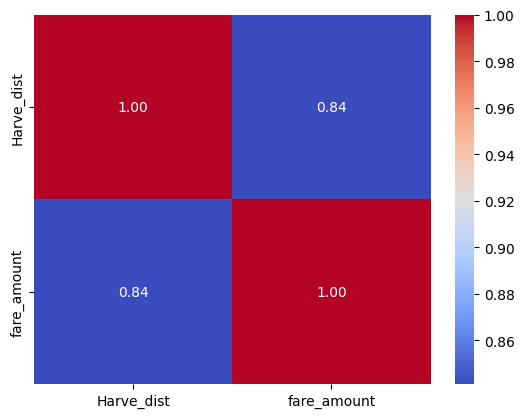

In [17]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [19]:
X=data['Harve_dist']
Y=data['fare_amount']

In [20]:
X.isna().sum()

0

In [21]:
xtrain, xtest, ytrain, ytest=train_test_split(X,Y,test_size=0.2,random_state=0)

In [22]:
lr=LinearRegression()
model=lr.fit(xtrain.values.reshape(-1,1),ytrain.values.reshape(-1,1))

In [23]:
y_train_pred = lr.predict(xtrain.values.reshape(-1,1))
y_test_pred = lr.predict(xtest.values.reshape(-1,1))

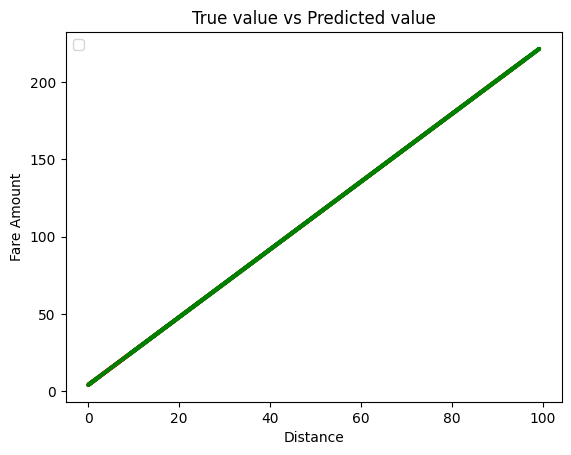

In [24]:
plt.xlabel('Distance')
plt.ylabel('Fare Amount')
plt.title("True value vs Predicted value")
plt.legend(loc= 'upper left')
plt.plot(xtest,y_test_pred,color='red',linewidth=3)
plt.plot(xtrain,y_train_pred,color='green',linewidth=3)
plt.xticks()
plt.yticks()
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(ytest, y_test_pred)
print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print("\n")

The model performance for testing set
--------------------------------------
MSE is 26.718778387351843




In [26]:
rmse=np.sqrt(mse)
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print("\n")


The model performance for testing set
--------------------------------------
RMSE is 5.169021027946379




In [27]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(ytest, y_test_pred)
print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print("\n")

The model performance for testing set
--------------------------------------
MAE is 2.4129590291367875




In [28]:
from sklearn.metrics import r2_score
r2 = r2_score(ytest, y_test_pred)
print("The model performance for testing set")
print("--------------------------------------")
print('R2 is {}'.format(r2))
print("\n")

The model performance for testing set
--------------------------------------
R2 is 0.7180860841375744




In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(xtrain.values.reshape(-1, 1), xtrain.values.reshape(-1, 1))
y_pred_rf = rf_model.predict(xtest.values.reshape(-1, 1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [30]:

r2_rf = r2_score(ytest, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(ytest, y_pred_rf))
print(f"Random Forest Regression - R2 Score: {r2_rf}")
print(f"Random Forest Regression - RMSE: {rmse_rf}")

Random Forest Regression - R2 Score: -0.17615564143155815
Random Forest Regression - RMSE: 10.558019016056894


In [ ]:
print("    Linear Regresssion \t\t\t\t Random Forest")
print("MAE  ",mae,"\t\t\t",mae)
print("MSE  ",mse,"\t\t\t",mse)
print("RMSE  ",rmse,"\t\t\t",rmse)
print("R2   ",r2,"\t\t\t\t",r2_rf)

    Linear Regresssion 				 Random Forest
MAE   2.215465354370331 			 2.215465354370331
MSE   21.378788494646322 			 21.378788494646322
RMSE   4.623720200730827 			 4.623720200730827
R2    0.34728912170127 				 -1.1797503215717056
